In [1]:
from vega_datasets import data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


### For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

Use the above dataset for the following exercises:



In [2]:
temps_df = data.sf_temps()

In [3]:
temps_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
temps_df = temps_df.set_index('date')

In [6]:
temps_df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [7]:
temps_df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


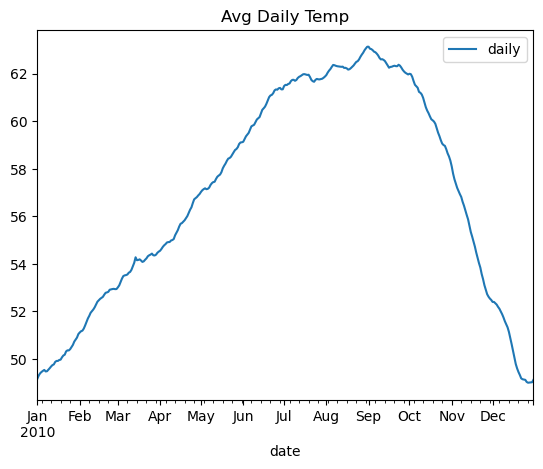

In [8]:
temps_df.resample('D').mean().temp.plot(label='daily')
plt.title('Avg Daily Temp')
plt.legend()
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.


In [9]:
temps_df.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


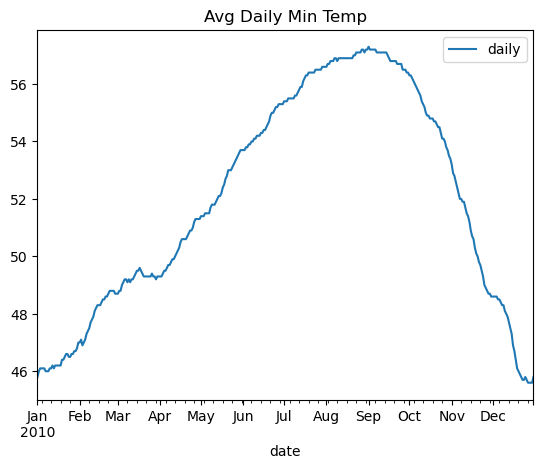

In [10]:
temps_df.resample('D').min().temp.plot(label='daily')
plt.title('Avg Daily Min Temp')
plt.legend()
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.


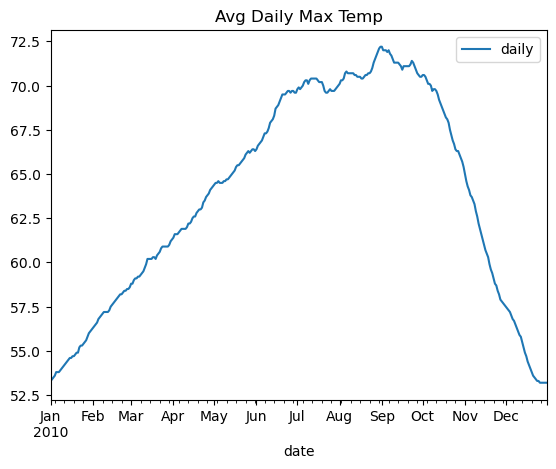

In [11]:
temps_df.resample('D').max().temp.plot(label='daily')
plt.title('Avg Daily Max Temp')
plt.legend()
plt.show()

### 4. Which month is the coldest, on average?


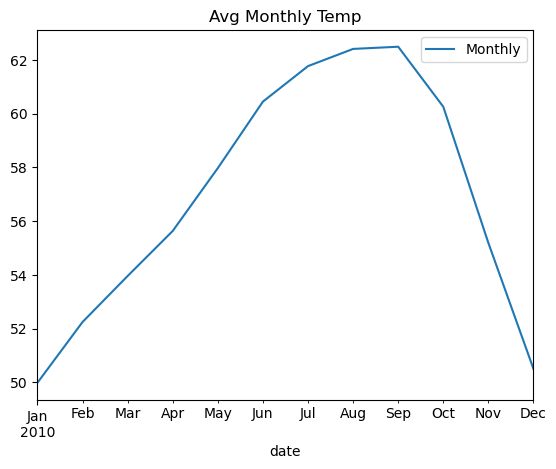

 Jan with an avg temp of 49.98413978494623


In [12]:
temps_df.resample('M').mean().temp.plot(label='Monthly')
plt.title('Avg Monthly Temp')
plt.legend()
plt.show()
print(f" Jan with an avg temp of {temps_df.resample('M').mean().temp.min()}")

### 5. Which month has the highest average temperature?


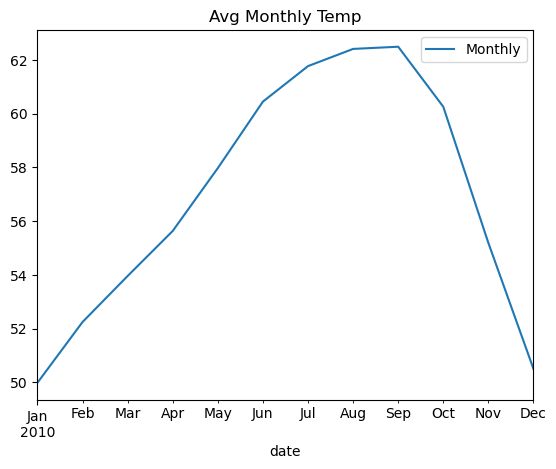

 Sep with an avg temp of 62.48708333333333


In [13]:
temps_df.resample('M').mean().temp.plot(label='Monthly')
plt.title('Avg Monthly Temp')
plt.legend()
plt.show()
print(f" Sep with an avg temp of {temps_df.resample('M').mean().temp.max()}")

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [14]:
daily_min_max = temps_df.resample('D').agg(['min', 'max']).temp

In [15]:
daily_min_max.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [16]:
daily_min_max['daily_change'] = daily_min_max['max'] - daily_min_max['min']

In [17]:
daily_min_max.sort_values('daily_change', ascending=False).head()

,min,max,daily_change
date,,,
2010-08-31,57.2,72.2,15.0
2010-09-01,57.3,72.2,14.9
2010-08-30,57.2,72.1,14.9
2010-08-29,57.1,71.9,14.8
2010-09-02,57.2,72.0,14.8


August has the highest daily change of temps

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

Use the above dataset for the following exercises:



In [18]:
seattle = data.seattle_weather()


In [19]:
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [20]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [21]:
seattle = seattle.set_index('date')

### 1. Which year and month combination has the highest amount of precipitation?


In [22]:
seattle.resample('M').max().precipitation.head(1)

date
2012-01-31    27.7
Freq: M, Name: precipitation, dtype: float64

### 2. Visualize the amount of monthly precipitation over time.


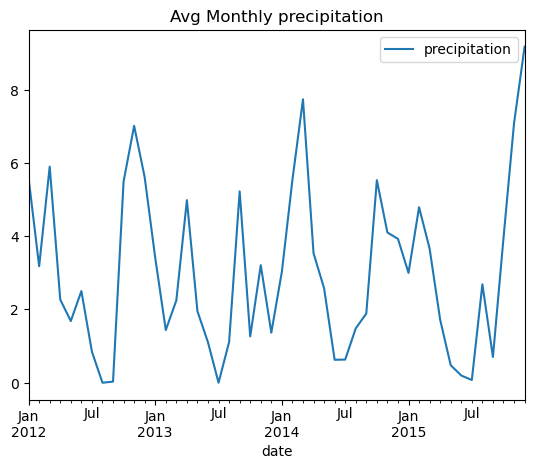

In [23]:
seattle.resample('M').precipitation.mean().plot(label='precipitation')
plt.title('Avg Monthly precipitation')
plt.legend()
plt.show()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


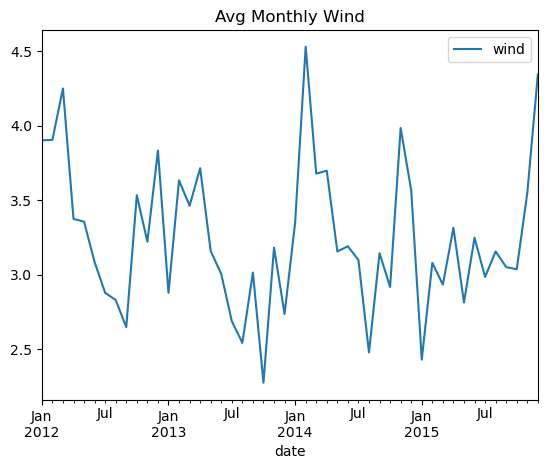

In [24]:
seattle.resample('M').wind.mean().plot(label='wind')
plt.title('Avg Monthly Wind')
plt.legend()
plt.show()

### 4. Which year-month combination is the windiest?


In [25]:
[seattle.resample('M').wind.mean().max()]

[4.5285714285714285]

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [26]:
is_sunny = seattle[(seattle.weather == 'sun')]

In [27]:
is_sunny.resample('Y').max()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,0.0,34.4,18.3,7.3,sun
2013-12-31,27.7,33.9,18.3,7.1,sun
2014-12-31,19.3,34.4,17.8,7.7,sun
2015-12-31,4.1,35.0,18.3,6.5,sun


2012 was the sunniest

### 6. In which month does it rain the most?


In [28]:
seattle.weather.value_counts()

weather
sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: count, dtype: int64

In [29]:
is_rainy = seattle[(seattle.weather == 'rain')]

In [30]:
seattle.resample('M').precipitation.mean().sort_values(ascending=False).head(1)

date
2015-12-31    9.177419
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [31]:
seattle[(seattle.precipitation != 0)].resample('M').count().head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,22,22,22,22,22


Use the above dataset for the following exercises:



In [48]:
flights = data.flights_20k()


In [49]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [50]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


### 1. Convert any negative delays to 0.


In [51]:
flights[(flights.delay < 0)]

,date,delay,distance,origin,destination
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
9,2001-01-27 07:00:00,-13,588,BNA,BWI
10,2001-01-02 11:40:00,-1,395,MDW,BNA
...,...,...,...,...,...
19981,2001-01-16 13:40:00,-8,223,BUR,LAS
19983,2001-01-26 13:50:00,-10,534,RDU,MCO
19989,2001-03-17 07:00:00,-15,256,LAS,PHX
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI


In [52]:
flights['delay'] = flights.delay.mask(flights.delay < 0, 0)

In [54]:
flights = flights.set_index('date')

In [58]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


### 2. Which hour of the day has the highest average delay?


In [59]:
flights.delay

date
2001-01-13 14:56:00    32
2001-01-31 16:40:00     0
2001-02-11 18:39:00     3
2001-01-10 21:00:00     0
2001-03-30 21:45:00     0
                       ..
2001-03-22 15:10:00     4
2001-01-19 13:05:00     0
2001-02-07 11:37:00     0
2001-02-24 16:50:00    42
2001-03-14 11:33:00     0
Name: delay, Length: 20000, dtype: int64

In [64]:
flights.delay.resample('h').mean().sort_values(ascending=False).head()

date
2001-02-23 03:00:00    360.0
2001-02-25 00:00:00    260.0
2001-01-02 03:00:00    245.0
2001-02-24 22:00:00    210.0
2001-02-22 00:00:00    195.0
Name: delay, dtype: float64

### 3. Does the day of the week make a difference in the delay amount?


In [65]:
flights['weekday'] = flights.index.day_name()

In [66]:
flights.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,Friday


In [69]:
delay_days = flights[['delay', 'weekday']]

In [70]:
delay_days.groupby('weekday').mean().delay

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

### 4. Does the month make a difference in the delay amount?

In [71]:
flights['month'] = flights.index.month_name()

In [72]:
flights.head()

,delay,distance,origin,destination,weekday,month
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,Friday,March


In [74]:
month_delay = flights[['delay', 'month']]

In [76]:
month_delay.groupby('month').mean().delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64